In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import numpy as np
import IPython.display as ipd
import IPython
from scipy.io import wavfile
import scipy.signal
%matplotlib inline

In [2]:
# recorded audio 
audio_record_path = "record.wav"
ipd.Audio(audio_record_path)

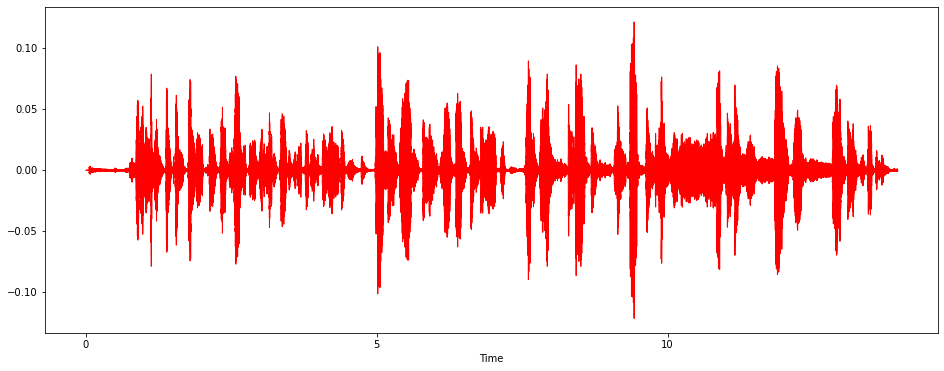

In [3]:
data, sample_rate = librosa.load(audio_record_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

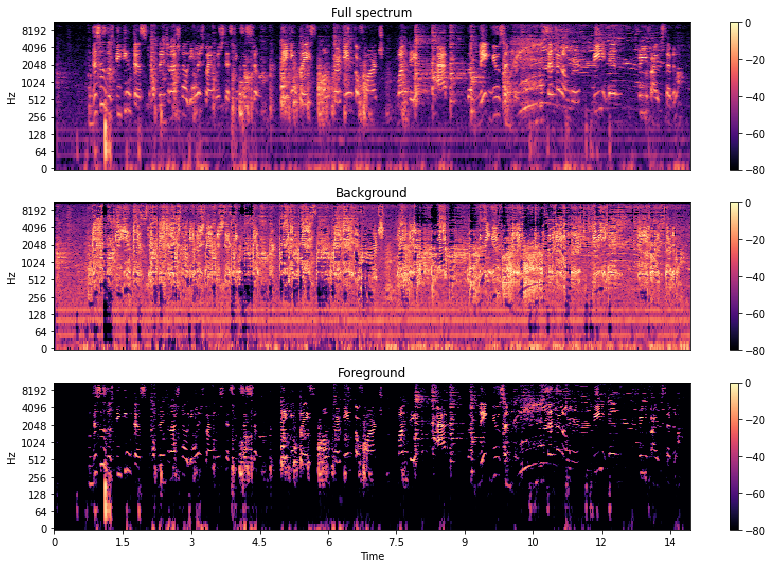

In [4]:
y, sr = librosa.load('record.wav')

# idx = slice(*librosa.time_to_frames([30, 35], sr=sr))

S_full, phase = librosa.magphase(librosa.stft(y))
S_filter = librosa.decompose.nn_filter(S_full,aggregate=np.median,metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

S_filter = np.minimum(S_full, S_filter)

margin_i, margin_v = 2, 10
power = 2


# for foreground 
mask_v = librosa.util.softmask(S_full - S_filter,margin_v * S_filter,power=power)

# for background 
mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter),power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full


full = librosa.amplitude_to_db(S_full, ref=np.max)
 
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(full, y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

background = librosa.amplitude_to_db(S_background, ref=np.max)

plt.subplot(3, 1, 2)
librosa.display.specshow(background,y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()

foreground = librosa.amplitude_to_db(S_foreground, ref=np.max)

plt.subplot(3, 1, 3)
librosa.display.specshow(foreground,y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()
 

In [5]:
import soundfile

print("y({}): {}".format(len(y),y))
print("sr: {}".format(sr))

record_audio = librosa.istft(S_full)
foreground_audio = librosa.istft(S_foreground)
print("full({}): {}".format(len(record_audio), record_audio))

soundfile.write('orig.WAV', y, sr) 
soundfile.write('full.WAV', record_audio, sr) 
soundfile.write('foreground.WAV', foreground_audio, sr) 

y(307466): [ 0.          0.          0.         ... -0.00017861 -0.00032053
  0.        ]
sr: 22050
full(307200): [-6.7810070e-08 -1.3319597e-07 -6.3787539e-08 ...  4.2566149e-05
  6.3294188e-05  1.7046190e-05]


In [6]:
# foreground audio 
foreground_audio_path = "foreground.wav"
ipd.Audio(foreground_audio_path)

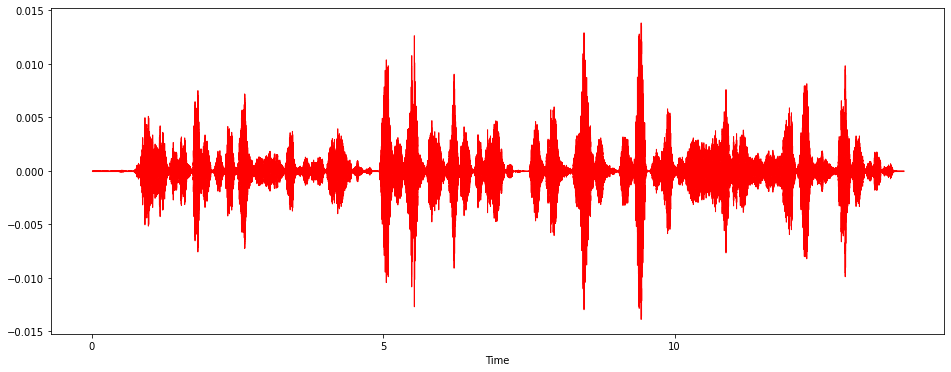

In [7]:
data, sample_rate = librosa.load(foreground_audio_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [8]:
y, sr = librosa.load('record.wav')
print("y({}): {}".format(len(y),y))
print("sr: {}".format(sr))

record_audio = librosa.istft(S_full)
background_audio = librosa.istft(S_background)
print("full({}): {}".format(len(record_audio), record_audio))

soundfile.write('background.WAV', background_audio, sr) 

y(307466): [ 0.          0.          0.         ... -0.00017861 -0.00032053
  0.        ]
sr: 22050
full(307200): [-6.7810070e-08 -1.3319597e-07 -6.3787539e-08 ...  4.2566149e-05
  6.3294188e-05  1.7046190e-05]


In [9]:
# background audio 
background_audio_path = "background.wav"
ipd.Audio(background_audio_path)

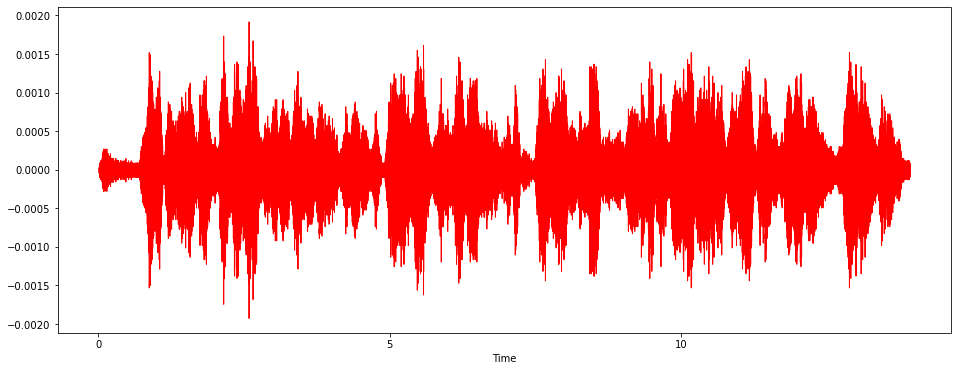

In [10]:
data, sample_rate = librosa.load(background_audio_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [11]:
# Noise reduction

In [12]:
# # Load data
# wav_loc = "record.wav"
# rate, data = wavfile.read(wav_loc)
# data = data / 32768

In [13]:
# def fftnoise(f):
#     f = np.array(f, dtype="complex")
#     Np = (len(f) - 1) // 2
#     phases = np.random.rand(Np) * 2 * np.pi
#     phases = np.cos(phases) + 1j * np.sin(phases)
#     f[1 : Np + 1] *= phases
#     f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
#     return np.fft.ifft(f).real


# def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
#     freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
#     f = np.zeros(samples)
#     f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
#     return fftnoise(f)

# IPython.display.Audio(data=data, rate=rate)


In [14]:
# fig, ax = plt.subplots(figsize=(20,4))
# ax.plot(data)

In [15]:
# # Add noise
# noise_len = 2 # seconds
# noise = band_limited_noise(min_freq=4000, max_freq = 12000, samples=len(data), samplerate=rate)*10
# noise_clip = noise[:rate*noise_len]
# audio_clip_band_limited = data+noise

# fig, ax = plt.subplots(figsize=(20,4))
# ax.plot(audio_clip_band_limited)
# IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

In [16]:
# # Denoise
# import time
# from datetime import timedelta as td


# def _stft(y, n_fft, hop_length, win_length):
#     return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


# def _istft(y, hop_length, win_length):
#     return librosa.istft(y, hop_length, win_length)


# def _amp_to_db(x):
#     return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


# def _db_to_amp(x,):
#     return librosa.core.db_to_amplitude(x, ref=1.0)


# def plot_spectrogram(signal, title):
#     fig, ax = plt.subplots(figsize=(20, 4))
#     cax = ax.matshow(
#         signal,
#         origin="lower",
#         aspect="auto",
#         cmap=plt.cm.seismic,
#         vmin=-1 * np.max(np.abs(signal)),
#         vmax=np.max(np.abs(signal)),
#     )
#     fig.colorbar(cax)
#     ax.set_title(title)
#     plt.tight_layout()
#     plt.show()


# def plot_statistics_and_filter(
#     mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
# ):
#     fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
#     plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
#     plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
#     plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
#     ax[0].set_title("Threshold for mask")
#     ax[0].legend()
#     cax = ax[1].matshow(smoothing_filter, origin="lower")
#     fig.colorbar(cax)
#     ax[1].set_title("Filter for smoothing Mask")
#     plt.show()


# def removeNoise(
#     audio_clip,
#     noise_clip,
#     n_grad_freq=2,
#     n_grad_time=4,
#     n_fft=2048,
#     win_length=2048,
#     hop_length=512,
#     n_std_thresh=1.5,
#     prop_decrease=1.0,
#     verbose=False,
#     visual=False,
# ):
#     """Remove noise from audio based upon a clip containing only noise

#     Args:
#         audio_clip (array): The first parameter.
#         noise_clip (array): The second parameter.
#         n_grad_freq (int): how many frequency channels to smooth over with the mask.
#         n_grad_time (int): how many time channels to smooth over with the mask.
#         n_fft (int): number audio of frames between STFT columns.
#         win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
#         hop_length (int):number audio of frames between STFT columns.
#         n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
#         prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
#         visual (bool): Whether to plot the steps of the algorithm

#     Returns:
#         array: The recovered signal with noise subtracted

#     """
#     if verbose:
#         start = time.time()
#     # STFT over noise
#     noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
#     noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
#     # Calculate statistics over noise
#     mean_freq_noise = np.mean(noise_stft_db, axis=1)
#     std_freq_noise = np.std(noise_stft_db, axis=1)
#     noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
#     if verbose:
#         print("STFT on noise:", td(seconds=time.time() - start))
#         start = time.time()
#     # STFT over signal
#     if verbose:
#         start = time.time()
#     sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
#     sig_stft_db = _amp_to_db(np.abs(sig_stft))
#     if verbose:
#         print("STFT on signal:", td(seconds=time.time() - start))
#         start = time.time()
#     # Calculate value to mask dB to
#     mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
#     print(noise_thresh, mask_gain_dB)
#     # Create a smoothing filter for the mask in time and frequency
#     smoothing_filter = np.outer(
#         np.concatenate(
#             [
#                 np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
#                 np.linspace(1, 0, n_grad_freq + 2),
#             ]
#         )[1:-1],
#         np.concatenate(
#             [
#                 np.linspace(0, 1, n_grad_time + 1, endpoint=False),
#                 np.linspace(1, 0, n_grad_time + 2),
#             ]
#         )[1:-1],
#     )
#     smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
#     # calculate the threshold for each frequency/time bin
#     db_thresh = np.repeat(
#         np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
#         np.shape(sig_stft_db)[1],
#         axis=0,
#     ).T
#     # mask if the signal is above the threshold
#     sig_mask = sig_stft_db < db_thresh
#     if verbose:
#         print("Masking:", td(seconds=time.time() - start))
#         start = time.time()
#     # convolve the mask with a smoothing filter
#     sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
#     sig_mask = sig_mask * prop_decrease
#     if verbose:
#         print("Mask convolution:", td(seconds=time.time() - start))
#         start = time.time()
#     # mask the signal
#     sig_stft_db_masked = (
#         sig_stft_db * (1 - sig_mask)
#         + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
#     )  # mask real
#     sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
#     sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
#         1j * sig_imag_masked
#     )
#     if verbose:
#         print("Mask application:", td(seconds=time.time() - start))
#         start = time.time()
#     # recover the signal
#     recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
#     recovered_spec = _amp_to_db(
#         np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
#     )
#     if verbose:
#         print("Signal recovery:", td(seconds=time.time() - start))
#     if visual:
#         plot_spectrogram(noise_stft_db, title="Noise")
#     if visual:
#         plot_statistics_and_filter(
#             mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
#         )
#     if visual:
#         plot_spectrogram(sig_stft_db, title="Signal")
#     if visual:
#         plot_spectrogram(sig_mask, title="Mask applied")
#     if visual:
#         plot_spectrogram(sig_stft_db_masked, title="Masked signal")
#     if visual:
#         plot_spectrogram(recovered_spec, title="Recovered spectrogram")
#     return recovered_signal

In [17]:
# output = removeNoise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip,verbose=True,visual=True)


In [18]:
# fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
# plt.plot(output, color='black')
# ax.set_xlim((0, len(output)))
# plt.show()
# # play back a sample of the song
# IPython.display.Audio(data=output, rate=44100)